Q63. 네이버 검색에서 관심 주제와 기사 수를 입력하면 그만큼 출력하는 크롤링 프로그램을 작성하여 다음 사항을 수행하세요.

기사 제목과 링크를 데이터프레임으로 가져온 후 본문 내용에서 한글 단어만 출력하여 형태소 분석 최근 국내 'AI'와 관련하여 가장 많이 언급되는 단어에 대한 빈도분석 및 시각화 AI 분야에서의 유의할 만한 트랜드 정보 및 인사이트 도출

In [ ]:
#불용어처리 - 빈도분석 - 시각화 - 워드클라우드

In [ ]:
# url = https://search.naver.com/search.naver?where=news&sm=tab_jum&query=

In [ ]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df

def News():
    global news_df
    
    keyword = input('검색 키워드를 입력해주세요 ')
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    num = int(input('추출할 뉴스기사의 숫자를 입력해주세요 '))
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser') ##html_doc 데이터를 html.parser로 파싱한 뒤 BeautifulSoup 객체를 생성해서 bs 변수에 넣음 
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text.get('href')
            # news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

News()

검색 키워드를 입력해주세요 AI
추출할 뉴스기사의 숫자를 입력해주세요 10


,title,url
0,"카카오벤처스 ""AI 임상시험 분석기업 액트노바에 시드투자""",https://www.yna.co.kr/view/AKR2022080903130001...
1,"충북도, AI영재고 카이스트 산하 고교로 설립 추진",https://www.wikitree.co.kr/articles/778793
2,"KT·서울성모병원, 당뇨 관리 돕는 AI 기술 개발",https://biz.chosun.com/it-science/ict/2022/08/...
3,삼성전자 ‘AI 챌린지’,https://www.chosun.com/economy/tech_it/2022/08...
4,"삼성전자, AI인재 키워 반도체·디스플레이 연구한다",https://zdnet.co.kr/view/?no=20220807083406
5,'2022 스마트농업 AI 경진대회' 개최,http://www.aflnews.co.kr/news/articleView.html...
6,"코트라, 'AI 활용'…중견기업 ESG 모니터링 지원",http://www.edaily.co.kr/news/newspath.asp?news...
7,"빅데이터·AI 기술로 교통사고 막는다… 도로교통공단, 위험도로예측 서비스 ...",https://www.donga.com/news/article/all/2022080...
8,"영남중·대구고 SW동아리, MS 주최 AI 경진대회 수상",https://www.pressian.com/pages/articles/202208...
9,"""AI로 기초학력 진단·혁신학교 재구조화""...경기교육감직 인수위, 백서발간",http://www.newsis.com/view/?id=NISX20220808_00...


In [ ]:
# 중복행 제거
dup = news_df.duplicated(['title'], keep='first')
dup

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [ ]:
news_df = news_df.drop_duplicates(['title'], keep='first') # 첫번째만 남기기
news_df

,title,url
0,"카카오벤처스 ""AI 임상시험 분석기업 액트노바에 시드투자""",https://www.yna.co.kr/view/AKR2022080903130001...
1,"충북도, AI영재고 카이스트 산하 고교로 설립 추진",https://www.wikitree.co.kr/articles/778793
2,"KT·서울성모병원, 당뇨 관리 돕는 AI 기술 개발",https://biz.chosun.com/it-science/ict/2022/08/...
3,삼성전자 ‘AI 챌린지’,https://www.chosun.com/economy/tech_it/2022/08...
4,"삼성전자, AI인재 키워 반도체·디스플레이 연구한다",https://zdnet.co.kr/view/?no=20220807083406
5,'2022 스마트농업 AI 경진대회' 개최,http://www.aflnews.co.kr/news/articleView.html...
6,"코트라, 'AI 활용'…중견기업 ESG 모니터링 지원",http://www.edaily.co.kr/news/newspath.asp?news...
7,"빅데이터·AI 기술로 교통사고 막는다… 도로교통공단, 위험도로예측 서비스 ...",https://www.donga.com/news/article/all/2022080...
8,"영남중·대구고 SW동아리, MS 주최 AI 경진대회 수상",https://www.pressian.com/pages/articles/202208...
9,"""AI로 기초학력 진단·혁신학교 재구조화""...경기교육감직 인수위, 백서발간",http://www.newsis.com/view/?id=NISX20220808_00...


In [ ]:
headers = {"user-agent":'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36'}

import requests
import re

def news_contents_crawler(news_url):
    
    for i in news_url:
        #각 기사 html get하기
        news = requests.get(i, headers=headers)
        news_html = BeautifulSoup(news.text,"html.parser")
        
        #기사 내용 가져오기 (p태그의 내용 모두 가져오기) 
        texts = news_html.find_all('p')
        li = []
        for t in texts:
          text = t.get_text()
          text = re.sub('[^가-힣]+',' ', text)

          li.append(text)

        li = ' '.join(li)
        result = re.sub('\s{2,}', ' ', li)

    return result

news_li = news_df['url'].tolist()
result = news_contents_crawler(news_li)
result

' 화 서울 수도권 로 기초학력 진단 혁신학교 재구조화 경기교육감직 인수위 백서발간 등록 기사내용 요약 기반 교육 글로컬 인재 육성 돌봄 확대 등 가지 정책 목표 담겨 수원 뉴시스 임태희 경기도교육감이 일 경기도교육청 방촌홀에서 열린 민선 기 경기도교육감직 인수위 백서 전수식에 참석했다 사진 경기도교육청 제공 재판매 및 금지 수원 뉴시스 임태희 경기도교육감이 일 경기도교육청 방촌홀에서 열린 민선 기 경기도교육감직 인수위 백서 전수식에 참석했다 사진 경기도교육청 제공 재판매 및 금지 수원 뉴시스 주민직선 기 경기도교육감직인수위원회 백서 사진 경기도교육청 제공 재판매 및 금지 수원 뉴시스 주민직선 기 경기도교육감직인수위원회 백서 사진 경기도교육청 제공 재판매 및 금지 무단 전재 및 재배포 금지 뉴시스 기획특집 대출 패턴 바뀌나 협력사 직고용 판결 서머랠리 닥치나 오피니언 조희연 서울시 교육감 세입학 대신 유보통합 완전 무상교육 해야 김혜경 기자 농심 수출용 라면 의 발암물질 대응 유감 뉴시스 물폭탄 여파로 용서고속도로 하산운터널 인근 옹벽 무너져 기록적인 폭우에 물바다 된 서울 누적 강수량 박순애 일만에 사퇴 학제개편 논란 제 불찰 흩어진 고려의 조각들 한자리에 이시간 핫 뉴스 오늘의 헤드라인 사망 명 실종 명 내일까지 더 퍼붓는다 서울 동작 관악서 감전 익사 명 경기 광주 급류 명 사망 부상 명 지난 일부터 이어진 기록적 폭우에 명이 숨지고 명이 실종됐다 부상자는 명 이재민은 세대 명이 발생했다 행정안전부 중앙재난안전대책본부 중대본 에 따르면 일 오전 시 기준 잠정 집계된 인명 피해는 사망 명 실종 명 부상 명이다 전날 오후 시 분께 서울 동작구에서 폭우로 쓰러진 가로수를 정리 작업하던 구청 대통령 홍수피해상황 점검 긴급대책회의 주재 서울시가 잠겼다 지하철역 침수 강남 일대 물바다 신규확진 만 명 전주 대비 배 법인세 깎고 부동산세 정상화 경제위기에 감세카드 이재용 신동빈 사면되나 오늘 광복절 특사 심사위 전국위 소집 비대위 전환 이준석 해임 유력 이재명 당헌 

In [ ]:
!pip install konlpy wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 5.5 MB/s 
     |████████████████████████████████| 453 kB 50.9 MB/s 


In [ ]:
#konlpy(코엔엘파이) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(result) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word = ['기반', '활용', '기술', '위해', '서비스', '구축', '솔루션', '기자', '단지',
             '가구','김소영', '활성화', '분야', '적극', '부위', '추진', '방안', '규제', 
             '원장', '비롯','안내서', '관련', '요인','뉴스','지원', '업비트','빗썸','코빗', '빅데이터','인공', '지능']
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기


#most_common() > 데이터의 개수가 많은 순으로 정렬된 배열을 리턴하는 메서드
#인자로 숫자 n을 넘기면 그 숫자 만큼만 리턴하기 때문에, 가장 개수가 많은 n개의 데이터를 얻을 수도 있습니다.
#(글자, 나온 횟수)를 요소로 가진 리스트를 반환함
data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df = pd.DataFrame(series, columns=['cnt'])

df = df.reset_index()
df

#data10 = df[:10]
#data10

ModuleNotFoundError: ignored

In [ ]:
# 한글폰트 사용
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic')# 한글 폰트 설정

# 시각화
sns.barplot(x='index', y='cnt', data=data10, orient='v')

(-0.5, 3999.5, 2999.5, -0.5)

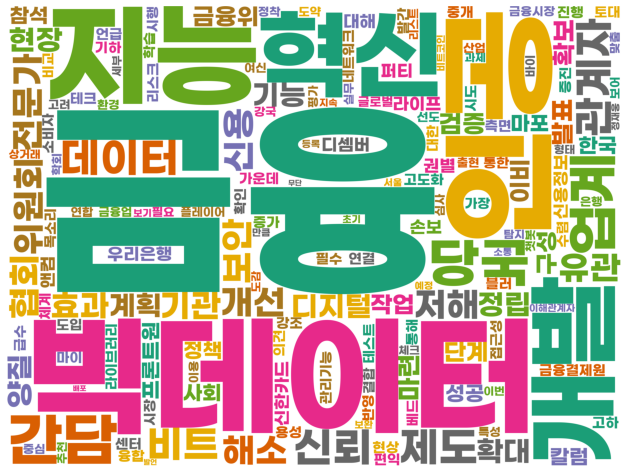

In [ ]:
from wordcloud import WordCloud

#generate_from_frequencies 미리 정의된 단어의 빈도수 dict를 이용하여 워드 클라우드를 그림
#  워드 클라우드를 generate할 때 마다 스타일이 미세하게 다르게 형성되는데,random_state 인자를 지정해주면 생성할 때마다 완전히 동일한 결과
wordcloud = WordCloud(font_path='GmarketSansTTFBold.ttf', width= 4000, 
                      height = 3000, random_state=1, background_color='white', 
                      colormap='Dark2', max_words=161).generate_from_frequencies(data)
plt.figure(figsize = (11, 11))
plt.imshow(wordcloud) #이미지 표시
plt.axis('off') #축 지우기